In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
print(tf.__version__)
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# !pip install -q tensorflow-datasets

2.3.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# for each review we get whether a review is positiv eor negative

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIYVUHH/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIYVUHH/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIYVUHH/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
type(imdb)

dict

In [5]:
type(imdb["train"])

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [6]:
for s,l in imdb["train"]:
  pass
print (type(s),type(l))

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [7]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [8]:
vocab_size = 10000
embedding_dim = 32
max_length = 120
trunc_type='post'
pad_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type,padding=pad_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding=pad_type,truncating=trunc_type)


In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# here we are decoding words based on word_index, word index by default does not include 0 in its embedding so we ever we get 0 there we replacing it with "?"

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print (padded[3])

this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
[  12    7    2  241    5   20   16    4 8776 2707 2653   52    2  358
    5    2  180   68  138 1401   17   92  203  968   15   23    1   81
    4  192 3109 3037    3    1   16    4  376    5  632  387  352   37
 6355    3 5559 1928   15  208 8596 3433    2  112  365   48   24   55
    1    6 1657   55 1818 4312   41    4 2263    3 1908    1  141  160
  780  111   31   92  116    4  221   20    9  173  279    3   29   13
 1012    2 2814   10 1985    0    0    0    0    0    0    0

In [10]:
print(training_sentences[3])

This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


In [46]:
    #ref https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/                         
    # Embedding layer-is initialized with random weights and will learn an embedding for all of the words in the training dataset.
    """It must specify 3 arguments:

input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. 
input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

The Embedding layer has weights that are learned. If you save your model to file, this will include weights for the Embedding layer.

The output of the Embedding layer is a 2D vector with one embedding for each word in the input sequence of words (input document).



"""

model = tf.keras.Sequential([


    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3840)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 23046     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 343,053
Trainable params: 343,053
Non-trainable params: 0
_________________________________________________________________


In [47]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4819 - accuracy: 0.7524 - val_loss: 0.4182 - val_accuracy: 0.8085
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2235 - accuracy: 0.9142 - val_loss: 0.4126 - val_accuracy: 0.8212
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0733 - accuracy: 0.9823 - val_loss: 0.5039 - val_accuracy: 0.8118
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0191 - accuracy: 0.9974 - val_loss: 0.5860 - val_accuracy: 0.8142
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 0.7080 - val_accuracy: 0.8066
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0032 - accuracy: 0.9998 - val_loss: 0.7350 - val_accuracy: 0.8130
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.7986 - val_accuracy: 0.8128
Epoch 

In [44]:
"""Flatten will take a tensor of any shape and transform it into a one dimensional tensor (plus the samples dimension) but keeping all values in the tensor. 
GlobalAveragePooling2D does something different. It applies average pooling on the spatial dimensions until each spatial dimension is one, and leaves other dimensions unchanged. In this case values are not kept as they are averaged.
So, we should expect less accuracy in this model as some information is lost"""

model2 = tf.keras.Sequential([


    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 320,205
Trainable params: 320,205
Non-trainable params: 0
_________________________________________________________________


In [45]:
num_epochs = 10
model2.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5311 - accuracy: 0.7553 - val_loss: 0.3965 - val_accuracy: 0.8276
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3247 - accuracy: 0.8655 - val_loss: 0.3669 - val_accuracy: 0.8380
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2640 - accuracy: 0.8940 - val_loss: 0.3768 - val_accuracy: 0.8355
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2272 - accuracy: 0.9122 - val_loss: 0.4060 - val_accuracy: 0.8308
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2017 - accuracy: 0.9256 - val_loss: 0.4517 - val_accuracy: 0.8201
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1779 - accuracy: 0.9363 - val_loss: 0.4817 - val_accuracy: 0.8186
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1634 - accuracy: 0.9432 - val_loss: 0.5078 - val_accuracy: 0.8150
Epoch 

In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 32)


In [16]:
# let us check the embeddings of each word
#embedding.tensorflow.org

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [17]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


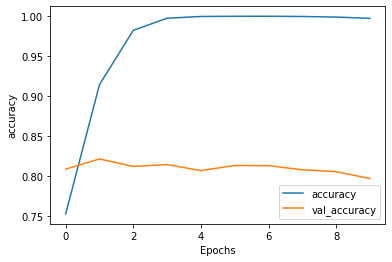

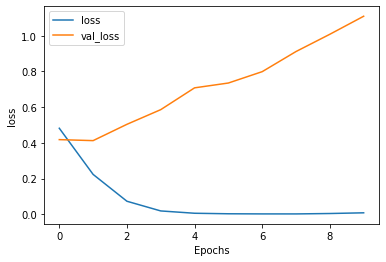

In [48]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [20]:

pred = (model.predict(testing_padded) > 0.5).astype("int32")
pred[:5]

array([[1],
       [1],
       [0],
       [0],
       [1]], dtype=int32)

In [35]:
cm = confusion_matrix(testing_labels_final,pred)
cm

array([[10349,  2151],
       [ 2476, 10024]])

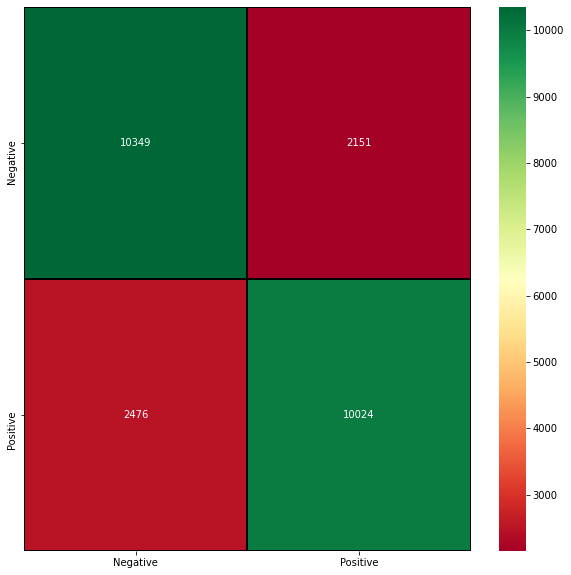

In [36]:
cm = pd.DataFrame(cm , index = ['Negative','Positive'] , columns = ['Negative','Positive'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "RdYlGn", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Negative','Positive'] , yticklabels = ['Negative','Positive'])